In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

from eq_tools import *

In [2]:
radii = [1.0, 0.5] #, 0.2, 0.1] # Outer is always first
#radii = np.arange(1.0,0.05,-0.05)

velocities = [1.0, 0.7]

In [3]:
radii = [1.0, 0.5]
velocities = [1.0, 0.7]
rays = []
#ray = [[0.0, 1.0],[1.0, new_y(0,1,1,np.deg2rad(-85.))]]
#rays.append(ray)

origin = [0.0, 1.0]

#angles = [-87., -85., -80., -75., -70., -65,-61,-50]
angles = np.arange(-90, -20, 5)
#angles = [-80.]

for a in angles:
    x,y,angle = trace_to_radius(origin[0],origin[1], np.deg2rad(a), radii[0],radii[1], velocities[0], velocities[1])
    #print "x,y,angle",x,y,angle

    if x is not None:
        ray = [[origin[0],x],[origin[1],y]]
        rays.append(ray)

        # Uncomment this to print the radial lines
        #rays.append([[0,2*x],[0,2*y]])

        x1,y1,angle1 = trace_to_radius(x,y, angle, radii[1],radii[1],velocities[1], velocities[0])

        # Uncomment this to print the radial lines
        #rays.append([[0,2*x1],[0,2*y1]])

        ray = [[x,x1],[y,y1]]
        rays.append(ray)

        x2,y2,angle2 = trace_to_radius(x1,y1, angle1, radii[1],radii[0],velocities[1], velocities[1])

        ray = [[x1,x2],[y1,y2]]
        rays.append(ray)
    
    else:
        x,y,angle = trace_to_radius(origin[0],origin[1], np.deg2rad(a), radii[0],radii[0], velocities[0], velocities[0])
        ray = [[origin[0],x],[origin[1],y]]
        rays.append(ray)   
            
plt.figure(figsize=(6,6))
draw_earth(radii)
for ray in rays:
    plt.plot(ray[0],ray[1],'r-',linewidth=0.5,alpha=1.0)



<IPython.core.display.Javascript object>

[Cool image](http://www.earthmagazine.org/article/march-29-1936-notes-earths-inner-core)

<IPython.core.display.Javascript object>


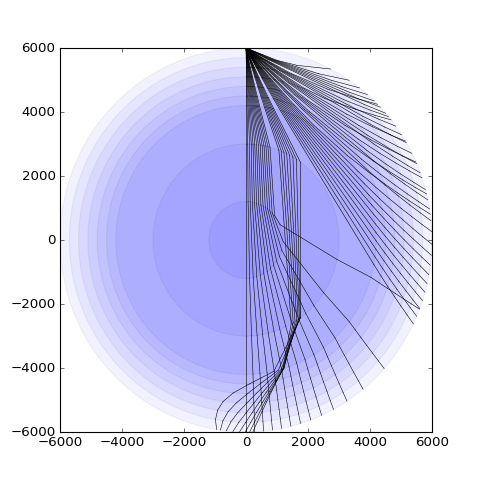

(-6000, 6000)

In [23]:
radii = [1.0, 0.95, 0.90, 0.85, 0.80, 0.75, 0.7, 0.5, 0.2] #, 0.2, 0.1] # Outer is always first
#radii = np.arange(1.0,0.05,-0.05)
#radii = [1.0, 0.7, 0.5, 0.2]

#velocities = [1.0, 0.7, 0.4, 0.9]
velocities = [12.5, 12.7, 12.9, 13.1, 13.3, 13.5, 13.7, 9., 11.]

radii = np.array(radii)*6000.0
nradii = len(radii)
origin = [0.0, 6000.0]

angles = np.arange(-90, -20, 1)
#angles = np.array([-75.])
angles = np.deg2rad(angles)
#angles = [-80.]

nangles = len(angles)

allrays = []
tirs = []

x0=0
y0=0
a=0
for i in range(nangles):

    tir = False # Total Internal Reflection flag
    rays = []

    a = angles[i]
    #print "ANGLE ----- ",a,np.rad2deg(a)

    innermost = False
    for j in range(nradii):
        
        radius = j

        if j==0:
            x0 = origin[0]
            y0 = origin[1]


        # Innermost layer
        if j!=nradii-1:
            #print "A"
            x,y,angle = trace_to_radius(x0,y0, a, radii[j],radii[j+1], velocities[j], velocities[j+1])
        else:
            #print "B"
            x,y,angle = trace_to_radius(x0,y0, a, radii[j],radii[j], velocities[j], velocities[j-1])
            innermost = True

        if x==y and x==-999:
            # There was total internal reflection somewhere
            tir = True
            break

            
        if x is not None:
            ray = [[x0,x],[y0,y]]
            rays.append([ray,radius])
            a = angle
            x0 = x
            y0 = y
            #print "C ",j,a,np.rad2deg(a)

        else:
            # It missed the inner layer
            x,y,angle = trace_to_radius(x0,y0, a, radii[j],radii[j], velocities[j], velocities[j-1])
            ray = [[x0,x],[y0,y]]
            rays.append([ray,radius]) 
            a = angle
            x0 = x
            y0 = y
            #print "D ",j,a,np.rad2deg(a)
            break

        if innermost:
            #print "E"
            radius = j
            break
            
    #############################
    # Come out of the Earth!
    #############################
    if tir==False:
        #print "COMING OUT OF THE EARTH ",radius, a
        for j in range(radius,0,-1):
            
            radius = j

            #print "G ",j
            if j==0:
                #print "0000000000000000000"
                x,y,angle = trace_to_radius(x0,y0, a, radii[j],radii[j], velocities[j], velocities[j])
            else:
                x,y,angle = trace_to_radius(x0,y0, a, radii[j],radii[j-1], velocities[j], velocities[j-1])
                #print "H",x0,y0,a,x,y,angle
                
                
            if x==y and x==-999:
                # There was total internal reflection somewhere
                tir = True
                break
                
            #print "IIIIIIIIIIIIIIII"
            ray = [[x0,x],[y0,y]]
            rays.append([ray,radius]) 
            a = angle
            x0 = x
            y0 = y

    tirs.append(tir)
    allrays.append(rays)
    
plt.figure(figsize=(6,6))
draw_earth(radii)

times = []
ang_distances = []
for tir,rays in zip(tirs,allrays):
    if tir==False:
        time = 0
        for rayinfo in rays:
            ray = rayinfo[0]
            radius = rayinfo[1]
            plt.plot(ray[0],ray[1],'k-',linewidth=0.5,alpha=1.0)
            
            vel = velocities[radius]
            d = distance_traversed(ray[0],ray[1])
            time += d/vel

        times.append(time)

        last_ray = rays[-1]
        rayinfo = last_ray[0]
        x = rayinfo[0][1]
        y = rayinfo[1][1]
        ang_distance = np.arctan2(y,x)
        ang_distances.append(ang_distance)
            
plt.xlim(-6000,6000)
plt.ylim(-6000,6000)

In [ ]:
np.rad2deg(np.arctan2(allrays[-1][-1][1][1],allrays[-1][-1][0][1]))

<IPython.core.display.Javascript object>


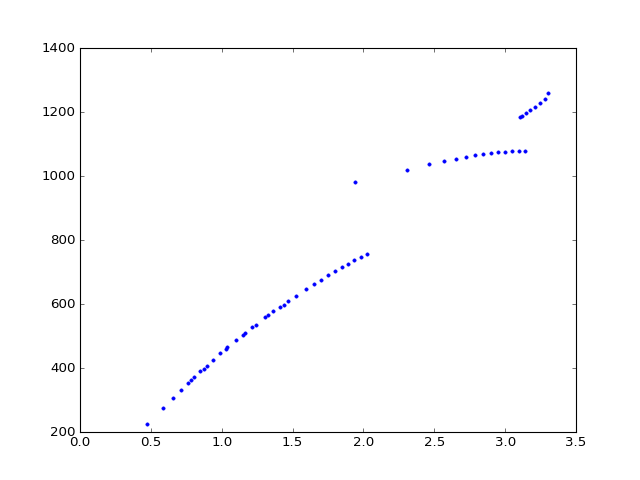

In [24]:
ang_distances = np.array(ang_distances)
ang_distances = np.pi/2.0 - ang_distances

plt.figure()
plt.plot(ang_distances,times,'.')

In [12]:
print times

[1077.7550417584605, 1076.8070060429063, 1073.8746044246902, 1068.6410921697111, 1060.335061959174, 1046.8973873905754, 1020.0706889617596, 1188.8457028598696, 1205.3973483849393, 1227.9082783750532, 1260.6820537939047, 757.30901478613714, 737.05095096533194, 714.80357012236971, 690.08092362136938, 661.75753032298326, 625.90394475375592, 590.67923383109496, 558.44711615784342, 504.54216363086749, 528.77027692285856, 487.06520876457012, 406.86154561094395, 465.25853101795468, 423.56798246981458, 361.33687730846941, 371.97318905594449, 330.50460612174686, 275.79015772178263]


In [21]:
print ang_distances

[-1.5707963267948966, -1.4761630538072992, -1.3783440636180972, -1.2729737051630843, -1.1521568249704015, -0.99692180621987048, -0.73345747835312569, -1.551499337497573, -1.6056349057493053, -1.6770865729629911, -1.7293966176287714, -0.45167688730369954, -0.36507268643933449, -0.2755997261782393, -0.18165163590683486, -0.079567664369447996, 0.043375151459811918, 0.16270503365638092, 0.26570356471852186, 0.41799606778580672, 0.35712607089227499, 0.46825739963465712, 0.67592328904576826, 0.5315913627171639, 0.63467958843882788, 0.78510889890778301, 0.76418779526256442, 0.85923001596505744, 0.98263565566047484]


In [15]:
np.arctan2(5,4)

0.89605538457134393